# Table of Contents
### 1. Import Librairies
### 2. Import Data
### 3.Use Unsupervised Machine Learning
##### Use the Elbow Technique
##### K-means Clustering
##### Plot Clusters
### 4. Export the Data

# 1. Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import pylab as pl 

In [2]:
#This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

# 2. Import Data

In [3]:
#Create path
path = r'C:\Users\manev\Documents\Agentür für Arbeit\CareerFoundry\Data Immersion\Achievement 6\Film_Industry'

In [4]:
#Create data frame for the "movie_data_cleaned_35yr" data set
movie_data= pd.read_pickle(os.path.join(path,'Data','Prepared Data','movie_data_final.pkl'))

In [5]:
#Check the shape of the movie_data data set
movie_data.shape

(7000, 13)

In [6]:
movie_data.head()

,movie_name,MPAA_rating,genre,release_year,grade,nb_of_votes,director,writer,main_star,production_country,gross_revenue,production_company,runtime
641,Weird Science,PG-13,Comedy,1985,6.6,83000,John Hughes,John Hughes,Anthony Michael Hall,United States of America,38934048.0,Universal Pictures,94
642,The Goonies,PG,Adventure,1985,7.8,252000,Richard Donner,Chris Columbus,Sean Astin,United States of America,63980721.0,Warner Bros.,114
643,Back to the Future,PG,Adventure,1985,8.5,1100000,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States of America,381906762.0,Universal Pictures,116
644,To Live and Die in L.A.,R,Action,1985,7.3,31000,William Friedkin,Gerald Petievich,William Petersen,United States of America,17307019.0,SLM Production Group,116
645,Clue,PG,Comedy,1985,7.3,88000,Jonathan Lynn,John Landis,Eileen Brennan,United States of America,14643997.0,Paramount Pictures,94


In [7]:
#Create a subset containing only numerical variables
movie_data_numerical = movie_data[['grade','nb_of_votes', 'gross_revenue','runtime']]

In [8]:
#Check the data in this subset
movie_data_numerical.shape

(7000, 4)

In [9]:
movie_data_numerical.head()

,grade,nb_of_votes,gross_revenue,runtime
641,6.6,83000,38934048.0,94
642,7.8,252000,63980721.0,114
643,8.5,1100000,381906762.0,116
644,7.3,31000,17307019.0,116
645,7.3,88000,14643997.0,94


In [10]:
original_indices = movie_data.index.tolist()

In [11]:
#Standardize the data
scaler = StandardScaler()
movie_data_numerical = scaler.fit_transform(movie_data_numerical) 

In [12]:
movie_data_numerical = pd.DataFrame(movie_data_numerical, columns=['grade','nb_of_votes', 'gross_revenue','runtime'])

In [13]:
movie_data_numerical.head()

,grade,nb_of_votes,gross_revenue,runtime
0,0.199605,-0.060979,-0.258757,-0.724416
1,1.450300,0.951817,-0.111024,0.351800
2,2.179871,6.033774,1.764200,0.459421
3,0.929177,-0.372608,-0.386320,0.459421
4,0.929177,-0.031014,-0.402027,-0.724416


In [14]:
movie_data_numerical.shape

(7000, 4)

# 3.Use Unsupervised Machine Learning

## Use the Elbow Technique

In [15]:
#Define the range of potential clusters
num_cl = range(1, 10)

In [16]:
#Define k-means clusters in the range assigned
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [17]:
#Apply the k-means algorithm
score = [kmeans[i].fit(movie_data_numerical).score(movie_data_numerical) for i in range(len(kmeans))]

C:\Users\manev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manev\anaconda3\Lib\site-packages\sklearn\clust

In [18]:
#Look at the values for "score"
score

[-28000.000000000004,
 -19423.92630009822,
 -14726.210847149345,
 -12373.20674213397,
 -10854.02001383562,
 -9741.817926571237,
 -8822.253217329297,
 -8036.6026218103725,
 -7368.554138632259]

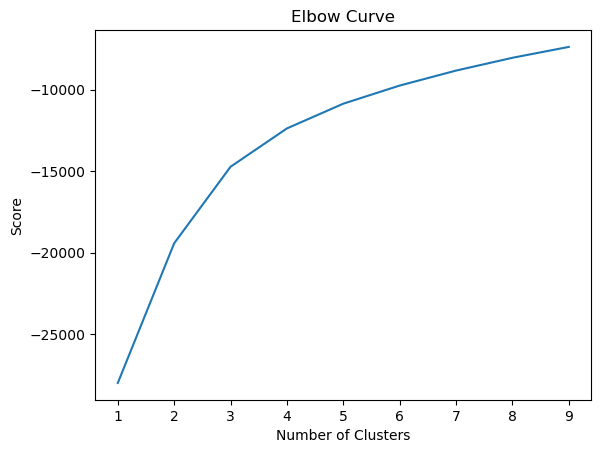

In [19]:
#Plot the elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve flattens out after 3, so the optimal number of cluster here is 3.

## K-means Clustering

In [20]:
#Create the k-means object and fit the model to the data set
kmeans = KMeans(n_clusters = 3) 
kmeans.fit(movie_data_numerical)

C:\Users\manev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
#Add a column stating which cluster the record belongs to
clusters = kmeans.fit_predict(movie_data_numerical)

C:\Users\manev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
#Check that the clusters column has been added to the data set
movie_data_numerical.head()

,grade,nb_of_votes,gross_revenue,runtime
0,0.199605,-0.060979,-0.258757,-0.724416
1,1.450300,0.951817,-0.111024,0.351800
2,2.179871,6.033774,1.764200,0.459421
3,0.929177,-0.372608,-0.386320,0.459421
4,0.929177,-0.031014,-0.402027,-0.724416


In [23]:
# Create a DataFrame with original indices and corresponding clusters
result_df = pd.DataFrame({'OriginalIndex': original_indices, 'Cluster': clusters})

# Merge this DataFrame with your original dataset
merged_df = pd.merge(movie_data, result_df, left_index=True, right_on='OriginalIndex')

In [24]:
merged_df.head()

,movie_name,MPAA_rating,genre,release_year,grade,nb_of_votes,director,writer,main_star,production_country,gross_revenue,production_company,runtime,OriginalIndex,Cluster
0,Weird Science,PG-13,Comedy,1985,6.6,83000,John Hughes,John Hughes,Anthony Michael Hall,United States of America,38934048.0,Universal Pictures,94,641,0
1,The Goonies,PG,Adventure,1985,7.8,252000,Richard Donner,Chris Columbus,Sean Astin,United States of America,63980721.0,Warner Bros.,114,642,2
2,Back to the Future,PG,Adventure,1985,8.5,1100000,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States of America,381906762.0,Universal Pictures,116,643,1
3,To Live and Die in L.A.,R,Action,1985,7.3,31000,William Friedkin,Gerald Petievich,William Petersen,United States of America,17307019.0,SLM Production Group,116,644,2
4,Clue,PG,Comedy,1985,7.3,88000,Jonathan Lynn,John Landis,Eileen Brennan,United States of America,14643997.0,Paramount Pictures,94,645,2


## Plot Clusters

In [25]:
#Add a column stating which cluster the record belongs to
movie_data_numerical['clusters'] = kmeans.fit_predict(movie_data_numerical)

C:\Users\manev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
movie_data_numerical['clusters'].value_counts()

clusters
0    3466
1    3129
2     405
Name: count, dtype: int64

Text(0, 0.5, 'Number of votes')

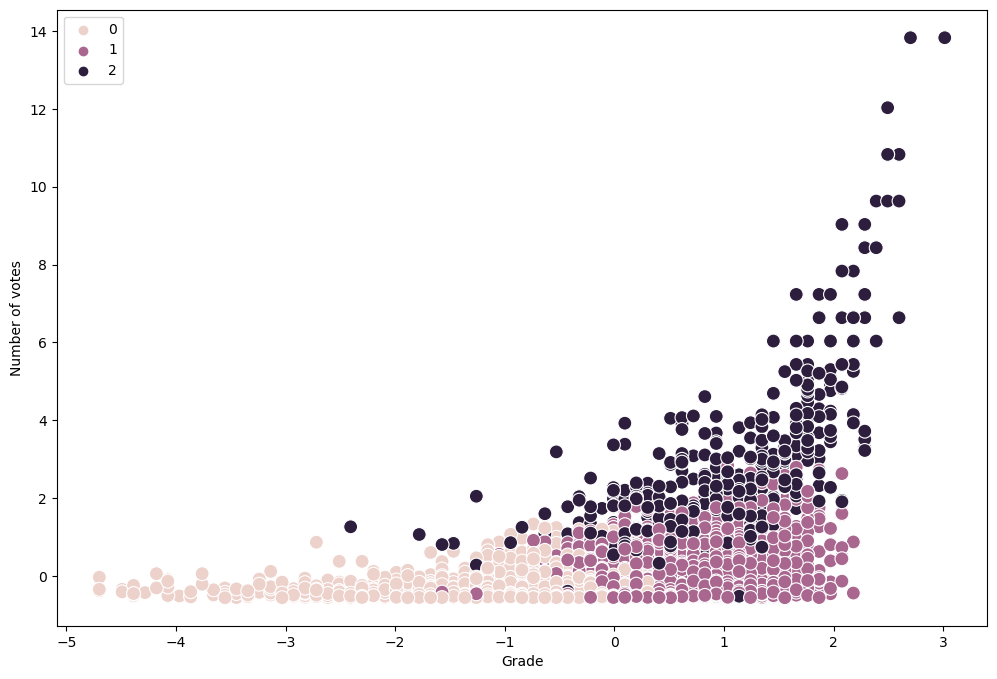

In [27]:
# Plot the clusters for the "grade" and "nb_of_votes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=movie_data_numerical['grade'], y=movie_data_numerical['nb_of_votes'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Grade') 
plt.ylabel('Number of votes') 


The pink cluster seems to mainly include movies that have low grades and a low or medium number of votes.
The purple cluster seems to mainly include movies that have high grades and low or medium number of votes.
The dark purple cluster seems to mainly include movies that have medium or high grades and high number of votes.

Text(0, 0.5, 'Number of votes')

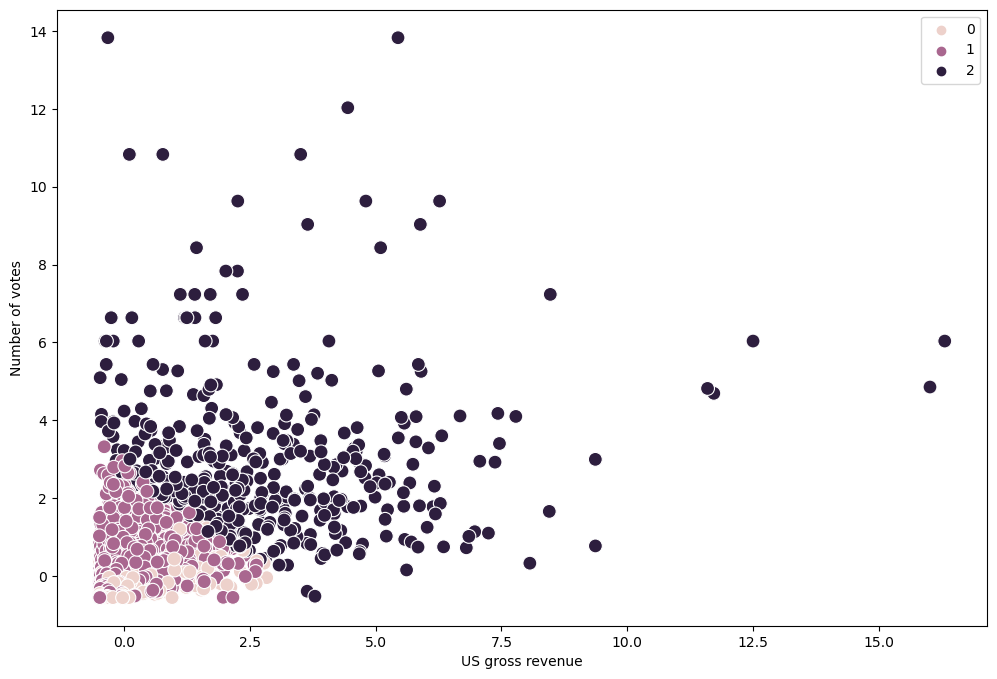

In [28]:
# Plot the clusters for the "gross_revenue" and "nb_of_votes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=movie_data_numerical['gross_revenue'], y=movie_data_numerical['nb_of_votes'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('US gross revenue') 
plt.ylabel('Number of votes') 

It looks like movies that have low grades and a low or medium number of votes (pink) and movies that have high grades and low or medium number of votes (purple) tend to generate relatively low US gross revenue ( less than 3 in standardized values).

On the other hand, movies that have medium or high grades and high number of votes (dark purple) are the only ones who generate high US gross revenues (above 3 in standardized values). It is important to not that not all movies belonging to the dark purple cluster generate high US gross revenue, but they are the only type of movies that sometimes does.

Text(0, 0.5, 'Number of votes')

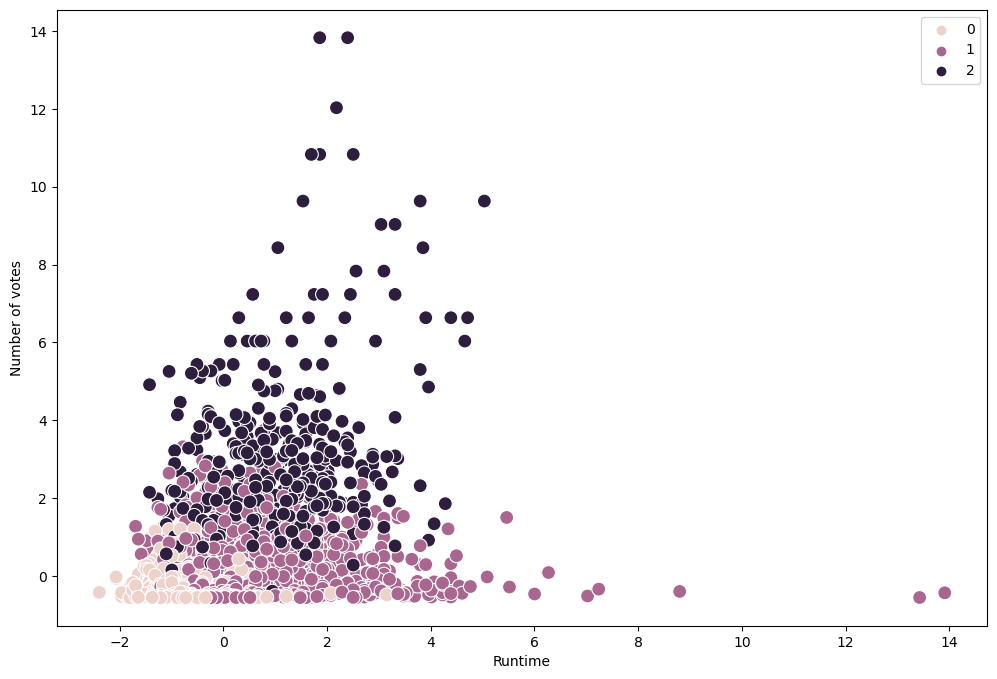

In [29]:
# Plot the clusters for the "runtime" and "nb_of_votes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=movie_data_numerical['runtime'], y=movie_data_numerical['nb_of_votes'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Runtime') 
plt.ylabel('Number of votes') 

Although not all movies belonging to the purple cluster (high grades, low or medium number of votes and a relatively low US gross revenue) have a high runtime, they are the only type of movies that ever has a runtime above 5 (standardized value).

Movies from the pink cluster (low grades, a low or medium number of votes and a relatively low US gross revenue) tend to have shorter runtimes ( mainly between -2 and 0 in standardized values, with very few movies between 0 and 3,5).

In [30]:
#Assign color names to the clusters
movie_data_numerical.loc[movie_data_numerical['clusters'] == 2, 'cluster'] = 'dark purple'
movie_data_numerical.loc[movie_data_numerical['clusters'] == 1, 'cluster'] = 'purple'
movie_data_numerical.loc[movie_data_numerical['clusters'] == 0, 'cluster'] = 'pink'

In [31]:
#Calculate the mean and median of each variable, for each cluster
pd.set_option('display.float_format', lambda x: '%.2f' % x)
movie_data_numerical.groupby('cluster').agg({'grade':['mean', 'median'], 
                         'nb_of_votes':['mean', 'median'], 
                         'gross_revenue':['mean', 'median'],
                          'runtime':['mean', 'median']})

grade        nb_of_votes        gross_revenue        runtime  \
             mean median        mean median          mean median    mean   
cluster                                                                    
dark purple  1.07   1.24        2.96   2.44          2.89   2.39    1.01   
pink        -0.71  -0.63       -0.34  -0.44         -0.23  -0.40   -0.55   
purple       0.65   0.62       -0.00  -0.22         -0.12  -0.34    0.48   

                    
            median  
cluster             
dark purple   0.94  
pink         -0.56  
purple        0.35

The mean and median of the variables in each cluster is not very interesting, as the standardized data makes it complicated to analyse the values. 

Yet, we can observe that the dark purple cluster has the higest mean and median for all variables. It is also the only cluster that has significantly less data points than the other ones (405, against 3486 data points for the pink cluster and 3109 data points for the purple cluster).

The pink cluster always has the lowest mean and median for all variables.

These 3 clusters could be used in future steps of an analytics pipeline. It could be interesting to see if calculating the linear regression of each cluster would produce results that are significantt and could help predict accurately the number a vote a movie would get, or not.

# 4. Export the Data

In [31]:
merged_df.to_csv(os.path.join(path,'Data','Prepared Data','movie_data_with_clusters.csv'),index=False)